In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Data Exploration

In [2]:
df = pd.read_csv("./2019_nCoV_data_new.csv")

In [3]:
df.head(10)

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0
5,6,1/22/2020 12:00,Guangdong,China,1/22/2020 12:00,26.0,0.0,0.0
6,7,1/22/2020 12:00,Guangxi,China,1/22/2020 12:00,2.0,0.0,0.0
7,8,1/22/2020 12:00,Guizhou,China,1/22/2020 12:00,1.0,0.0,0.0
8,9,1/22/2020 12:00,Hainan,China,1/22/2020 12:00,4.0,0.0,0.0
9,10,1/22/2020 12:00,Hebei,China,1/22/2020 12:00,1.0,0.0,0.0


## Question
#### Given that the number of patients with confirmed 2019-nCoV is increasing over time (in January), why there are drops in the chart generated from the notebook we created in class? 
Find the notebook [here](https://github.com/nyuvis/visual_analytics_course/blob/master/labs/lab1_Jupyter/2019_nCov.ipynb)

In [4]:
### put your answer here

df[(df['Last Update'] =='1/28/2020 18:00')]

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
300,301,1/28/2020 23:00,Washington,US,1/28/2020 18:00,1.0,0.0,0.0


Answer: Since we grouped by unique dates (including time) in the notebook, the one case reported in Washington on 1/28/2020 18:00 became a unique data point.

## Preprocessing
Because we want to generate a line chart where x-positions represent unique dates, we need to preprocess the date. In this dataset, there are differernt formats of date and time in the dataset, so we change all the date and time information into a uniform format with only date information.


Here we use the libraray `datetime` to achieve this. If you do not have this libraray, please install it. More details of the library `datetime` can be found here: https://docs.python.org/3.4/library/datetime.html?highlight=datetime

You can see a few examples of tranforming a time string into a `datetime.date` type. *%m* means Month as a zero-padded decimal number; *%M* means Minute as a zero-padded decimal number. The meanings can also be found in the library documentation.
 

In [5]:
import datetime

In [6]:
# 1/23/20 12:00 PM
datetime.datetime.strptime('1/23/20 12:00 PM', "%m/%d/%y %I:%M %p").date()

datetime.date(2020, 1, 23)

In [7]:
# 2020-01-02 23:33:00
datetime.datetime.strptime('2020-01-02 23:33:00', "%Y-%d-%m %H:%M:%S").date()

datetime.date(2020, 2, 1)

### Task 0: add one column of 'Date' for dates in a uniform format. 
Code is provided below, you do not need to change it.

In [8]:
dates = []
for x in df['Last Update']:
    try:
        pos = x.index('2020')
        fullyear = True
    except:
        fullyear = False
        
    try:
        pos = x.index('PM')
        hour24 = False
    except:
        hour24 = True
        
        
    if (fullyear and hour24):        
        dates.append(datetime.datetime.strptime(x, "%m/%d/%Y %H:%M").date())
    elif (fullyear and not hour24):
        dates.append(datetime.datetime.strptime(x, "%m/%d/%Y %I:%M %p").date())
    elif (not fullyear and not hour24):
        dates.append(datetime.datetime.strptime(x, "%m/%d/%y %I:%M %p").date())

df['Date'] = dates

## Task 1: get unique values in the column `Date` and print them.

In [9]:
uniq_dates = list(df['Date'].unique())
uniq_dates


[datetime.date(2020, 1, 22),
 datetime.date(2020, 1, 23),
 datetime.date(2020, 1, 24),
 datetime.date(2020, 1, 25),
 datetime.date(2020, 1, 26),
 datetime.date(2020, 1, 27),
 datetime.date(2020, 1, 28),
 datetime.date(2020, 1, 29),
 datetime.date(2020, 1, 30),
 datetime.date(2020, 1, 31)]

## Task 2: construct a DataFrame for plotting a line chart.
Please construct a DataFrame with 4 columns: Date, confirmed, recovered, deaths

In [18]:
confirmed=[]
recovered=[]
deaths=[]
for x in uniq_dates:
    confirmed.append(df[df['Date']==x]['Confirmed'].sum())
    recovered.append(df[df['Date']==x]['Recovered'].sum())
    deaths.append(df[df['Date']==x]['Deaths'].sum())

to_plot = pd.DataFrame()
to_plot['Date'] = uniq_dates
to_plot['confirmed'] = confirmed
to_plot['recovered'] = recovered
to_plot['deaths'] = deaths

to_plot.head(10)

,Date,confirmed,recovered,deaths
0,2020-01-22,555.0,0.0,0.0
1,2020-01-23,653.0,30.0,18.0
2,2020-01-24,941.0,36.0,26.0
3,2020-01-25,2019.0,49.0,56.0
4,2020-01-26,2794.0,54.0,80.0
5,2020-01-27,4473.0,63.0,107.0
6,2020-01-28,6057.0,110.0,132.0
7,2020-01-29,7783.0,133.0,170.0
8,2020-01-30,9776.0,187.0,213.0
9,2020-01-31,11374.0,252.0,259.0


## Task 3: Visualization
Plot a line chart that shows how the values of "confirmed", "recovered", and "deaths" change over time.

In [12]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

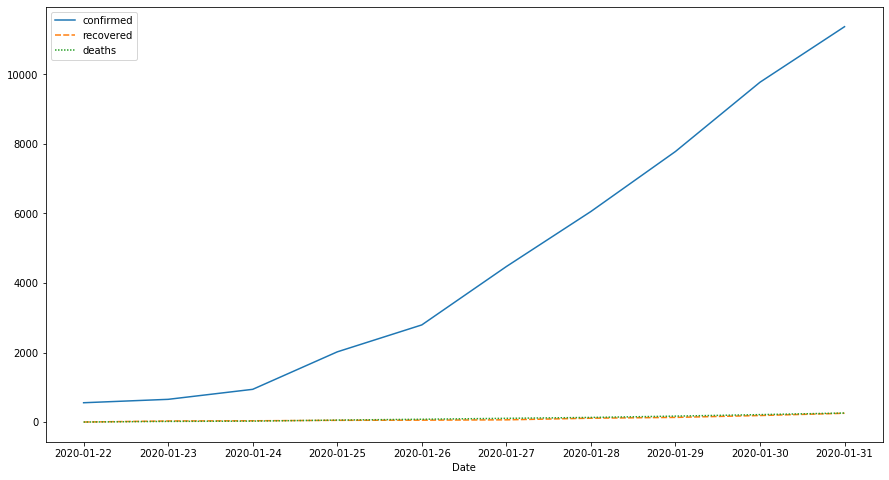

In [21]:
line_plot = to_plot.set_index('Date')
plt.figure(figsize=(15,8))
sns.lineplot(data=line_plot)

## Task 4: Markdown Grammar Practice
Please read the content of markdown cells in the slides/pdf of the lab. Create a few markdown cells as described below:
- A header
- A ordered list
- A bullet list
- Bold and Italics text

# This is a header

1. list
2. list 
4. list

- list
- list

**bold**
*italics*